In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset_dir = 'D:/Recycling_Keras/dataset/split_data/'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

image_width = 150
image_height = 150

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 17443 images belonging to 6 classes.
Found 2177 images belonging to 6 classes.
Found 2186 images belonging to 6 classes.


In [3]:
for data_batch, labels_batch in train_generator:
    break

In [4]:
data_batch.shape

(32, 150, 150, 3)

In [5]:
data_batch[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

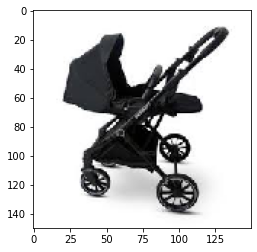

In [6]:
image = data_batch[0]

plt.imshow(image)
plt.show()

In [7]:
labels_batch[0]

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [8]:
labels_list = train_generator.class_indices
labels_list

{'battery': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [9]:
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'battery', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [10]:
labels_list[np.argmax(labels_batch[0])]

'trash'

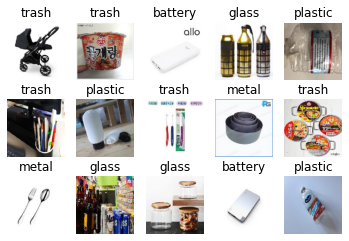

In [11]:
rows = 3
columns = 5

for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

In [12]:
def build_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(image_width, image_height, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))   

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

In [13]:
model = build_model()

history = model.fit_generator(train_generator,
                              steps_per_epoch=17443 / 32,
                              epochs=200,
                              validation_data=validation_generator,
                              validation_steps=2177 / 32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
546/545 [==============================] - 176s 323ms/step - loss: 1.6176 - accuracy: 0.3640 - val_loss: 1.5169 - val_accuracy: 0.3909
Epoch 2/200
546/545 [==============================] - 173s 316ms/step - loss: 1.3849 - accuracy: 0.4633 - val_loss: 1.3322 - val_accuracy: 0.4819
Epoch 3/200
546/545 [==============================] - 173s 316ms/step - loss: 1.2298 - accuracy: 0.5310 - val_loss: 1.2303 - val_accuracy: 0.5319
Epoch 4/200
546/545 [==============================] - 173s 317ms/step - loss: 1.0946 - accuracy: 0.5844 - val_loss: 1.2232 - val_accuracy: 0.5393
Epoch 5/200
546/545 [==============================] - 173s 316ms/step - loss: 0.9856 - accuracy: 0.6358 - val_loss: 1.1831 - val_accuracy: 0.5659
Epoch 6/200
546/545 [==============================] - 173s 317ms/step - loss: 0.8805 - accuracy: 0.6771 - val_loss: 1.2091 - val_accuracy: 0.5604
Epoch 7/200
546/545 [=====================

Epoch 55/200
546/545 [==============================] - 173s 317ms/step - loss: 0.3574 - accuracy: 0.9114 - val_loss: 3.6159 - val_accuracy: 0.5903
Epoch 56/200
546/545 [==============================] - 173s 316ms/step - loss: 0.3481 - accuracy: 0.9141 - val_loss: 2.9339 - val_accuracy: 0.5930
Epoch 57/200
546/545 [==============================] - 173s 317ms/step - loss: 0.3613 - accuracy: 0.9136 - val_loss: 4.4151 - val_accuracy: 0.5999
Epoch 58/200
546/545 [==============================] - 173s 317ms/step - loss: 0.3883 - accuracy: 0.9098 - val_loss: 3.1472 - val_accuracy: 0.5916
Epoch 59/200
546/545 [==============================] - 173s 317ms/step - loss: 0.3766 - accuracy: 0.9122 - val_loss: 2.7096 - val_accuracy: 0.5866
Epoch 60/200
546/545 [==============================] - 173s 317ms/step - loss: 0.3736 - accuracy: 0.9115 - val_loss: 3.4747 - val_accuracy: 0.6031
Epoch 61/200
546/545 [==============================] - 173s 317ms/step - loss: 0.3794 - accuracy: 0.9103 - val_

546/545 [==============================] - 173s 318ms/step - loss: 0.5316 - accuracy: 0.8789 - val_loss: 3.6408 - val_accuracy: 0.5857
Epoch 166/200
546/545 [==============================] - 174s 318ms/step - loss: 0.5390 - accuracy: 0.8779 - val_loss: 3.1067 - val_accuracy: 0.5802
Epoch 167/200
546/545 [==============================] - 173s 317ms/step - loss: 0.5271 - accuracy: 0.8801 - val_loss: 4.6341 - val_accuracy: 0.5930
Epoch 168/200
546/545 [==============================] - 174s 318ms/step - loss: 0.5338 - accuracy: 0.8758 - val_loss: 5.5346 - val_accuracy: 0.5609
Epoch 169/200
546/545 [==============================] - 174s 318ms/step - loss: 0.5586 - accuracy: 0.8676 - val_loss: 3.3249 - val_accuracy: 0.5825
Epoch 170/200
546/545 [==============================] - 173s 318ms/step - loss: 0.5508 - accuracy: 0.8700 - val_loss: 4.8184 - val_accuracy: 0.5825
Epoch 171/200
546/545 [==============================] - 174s 318ms/step - loss: 0.5499 - accuracy: 0.8741 - val_loss: 3

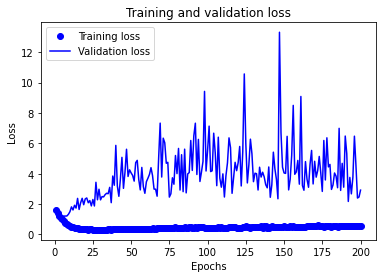

In [14]:
loss = history.history['loss']         
val_loss = history.history['val_loss'] 

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

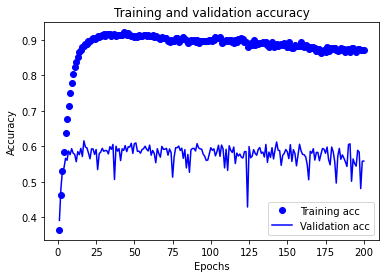

In [15]:
acc = history.history['accuracy']           
val_acc = history.history['val_accuracy']   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
model.save('./model/image_plus_battery.h5')

In [17]:
from keras.applications import inception_resnet_v2
pretrained = inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
pretrained.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

Total params: 54,336,736
Trainable params: 54,276,192
Non-trainable params: 60,544
__________________________________________________________________________________________________


In [18]:
model_sec = models.Sequential()
model_sec.add(pretrained)

model_sec.add(layers.Flatten())
model_sec.add(layers.Dropout(0.5))
model_sec.add(layers.Dense(6, activation = 'softmax'))

In [19]:
model_sec.compile(optimizer=optimizers.Adam(lr = 0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    

In [20]:
history = model_sec.fit_generator(train_generator,
                              steps_per_epoch=17443 / 32,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=2177 / 32)

Epoch 1/50
546/545 [==============================] - 1702s 3s/step - loss: 0.8515 - accuracy: 0.6927 - val_loss: 0.5263 - val_accuracy: 0.8199
Epoch 2/50
546/545 [==============================] - 1707s 3s/step - loss: 0.3317 - accuracy: 0.8845 - val_loss: 0.4390 - val_accuracy: 0.8539
Epoch 3/50
546/545 [==============================] - 1728s 3s/step - loss: 0.1577 - accuracy: 0.9461 - val_loss: 0.5050 - val_accuracy: 0.8535
Epoch 4/50
546/545 [==============================] - 1720s 3s/step - loss: 0.1058 - accuracy: 0.9640 - val_loss: 1.0192 - val_accuracy: 0.7960
Epoch 5/50
546/545 [==============================] - 1724s 3s/step - loss: 0.0914 - accuracy: 0.9701 - val_loss: 0.5418 - val_accuracy: 0.8654
Epoch 6/50
546/545 [==============================] - 1730s 3s/step - loss: 0.0725 - accuracy: 0.9751 - val_loss: 0.5480 - val_accuracy: 0.8663
Epoch 7/50
546/545 [==============================] - 1723s 3s/step - loss: 0.0681 - accuracy: 0.9778 - val_loss: 0.6616 - val_accuracy:

In [21]:
model.save('./model/imagenet_model.h5')

In [22]:
model = models.load_model('./model/imagenet_model.h5')

In [23]:
results = model.evaluate_generator(test_generator)
results

Instructions for updating:
Please use Model.evaluate, which supports generators.


[3.1285269260406494, 0.5494052767753601]

In [24]:
results = model.predict_generator(test_generator)
results

Instructions for updating:
Please use Model.predict, which supports generators.


array([[1.38742763e-13, 1.56377723e-11, 6.17356971e-03, 9.85053003e-01,
        1.16777329e-07, 8.77334084e-03],
       [5.03960311e-01, 3.48425540e-03, 4.91603017e-01, 5.28458077e-09,
        6.68292749e-04, 2.84182403e-04],
       [2.20992558e-09, 2.21120956e-07, 9.99007165e-01, 2.04515715e-09,
        9.81489778e-04, 1.10191068e-05],
       ...,
       [9.94057894e-01, 1.60834066e-23, 3.08545567e-09, 3.35798759e-05,
        4.67569797e-18, 5.90851717e-03],
       [1.60951619e-09, 1.09592564e-01, 8.90407443e-01, 1.00597000e-15,
        2.56161520e-13, 1.18003329e-10],
       [1.38339186e-02, 8.57653649e-05, 5.41028976e-01, 3.73778254e-01,
        3.73024568e-02, 3.39706205e-02]], dtype=float32)

In [25]:
results = np.argmax(results, 1)
results

array([3, 0, 2, ..., 0, 2, 2], dtype=int64)

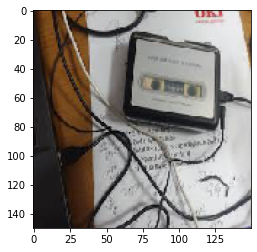

In [26]:
for data_batch, labels_batch in test_generator:
    break
    
image = data_batch[0]

plt.imshow(image)
plt.show()

In [27]:
results = model.predict(data_batch)

labels_list[np.argmax(results[0])]

'metal'